# 1. Chargement des donn√©es

In [4]:
import pandas as pd

# Charger le jeu de donn√©es
df = pd.read_csv("dataDiab√®te.csv")

# Aper√ßu de la structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2

In [5]:
df = df.drop('Unnamed: 0', axis=1)

le df apr√®s la suppression de la colonne Unnamed

# 2. Analyse exploratoire des donn√©es (EDA)

**2.1 V√©rification des dimensions et types**

In [6]:
print("Dimensions :", df.shape)
print("Types de donn√©es :", df.dtypes)

Dimensions : (768, 8)
Types de donn√©es : Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


**2.2 Valeurs manquantes**

In [7]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


aucun valeurs manquantes

**2.3 Doublons**

In [8]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


**2.4 Distribution des variables num√©riques**

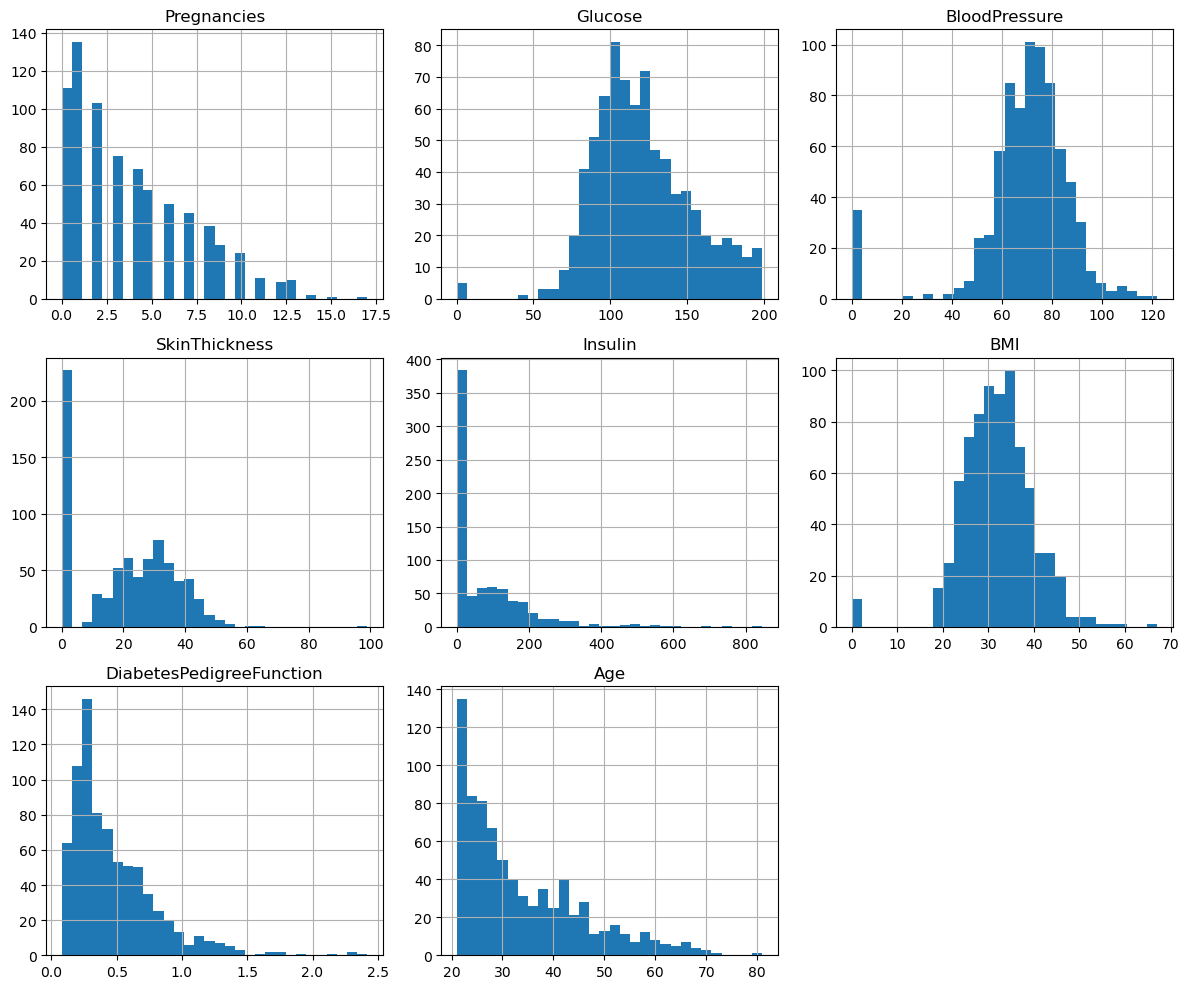

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


**2.5 Corr√©lation entre variables**

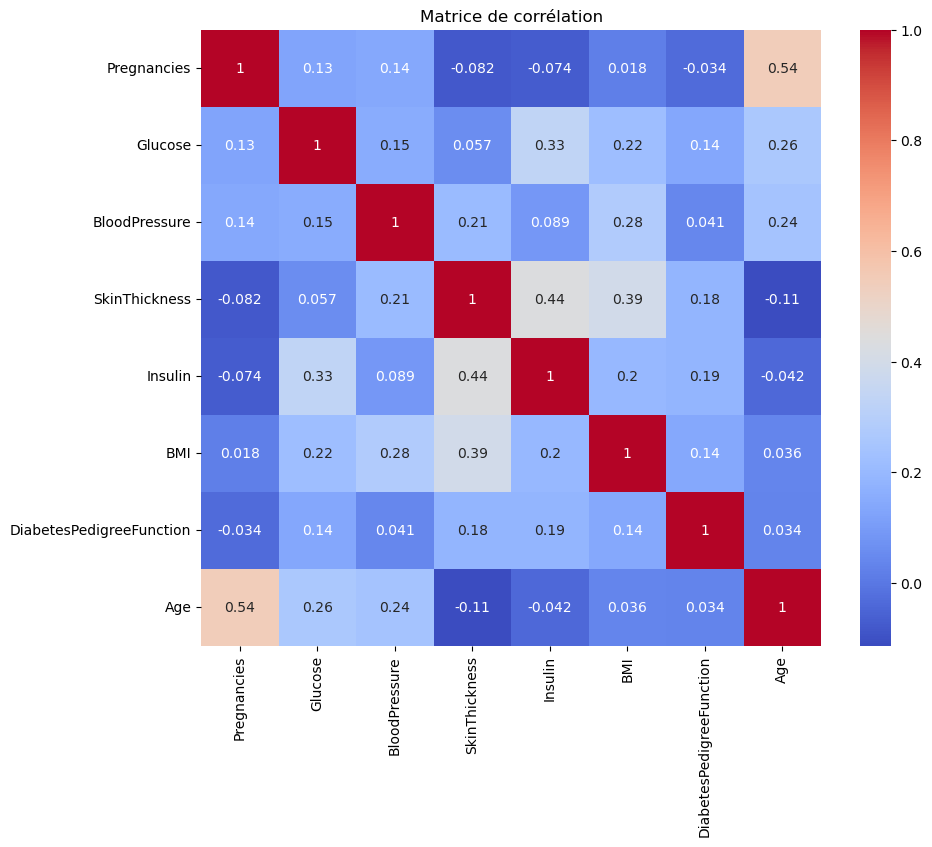

: 

: 

: 

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corr√©lation")
plt.show()


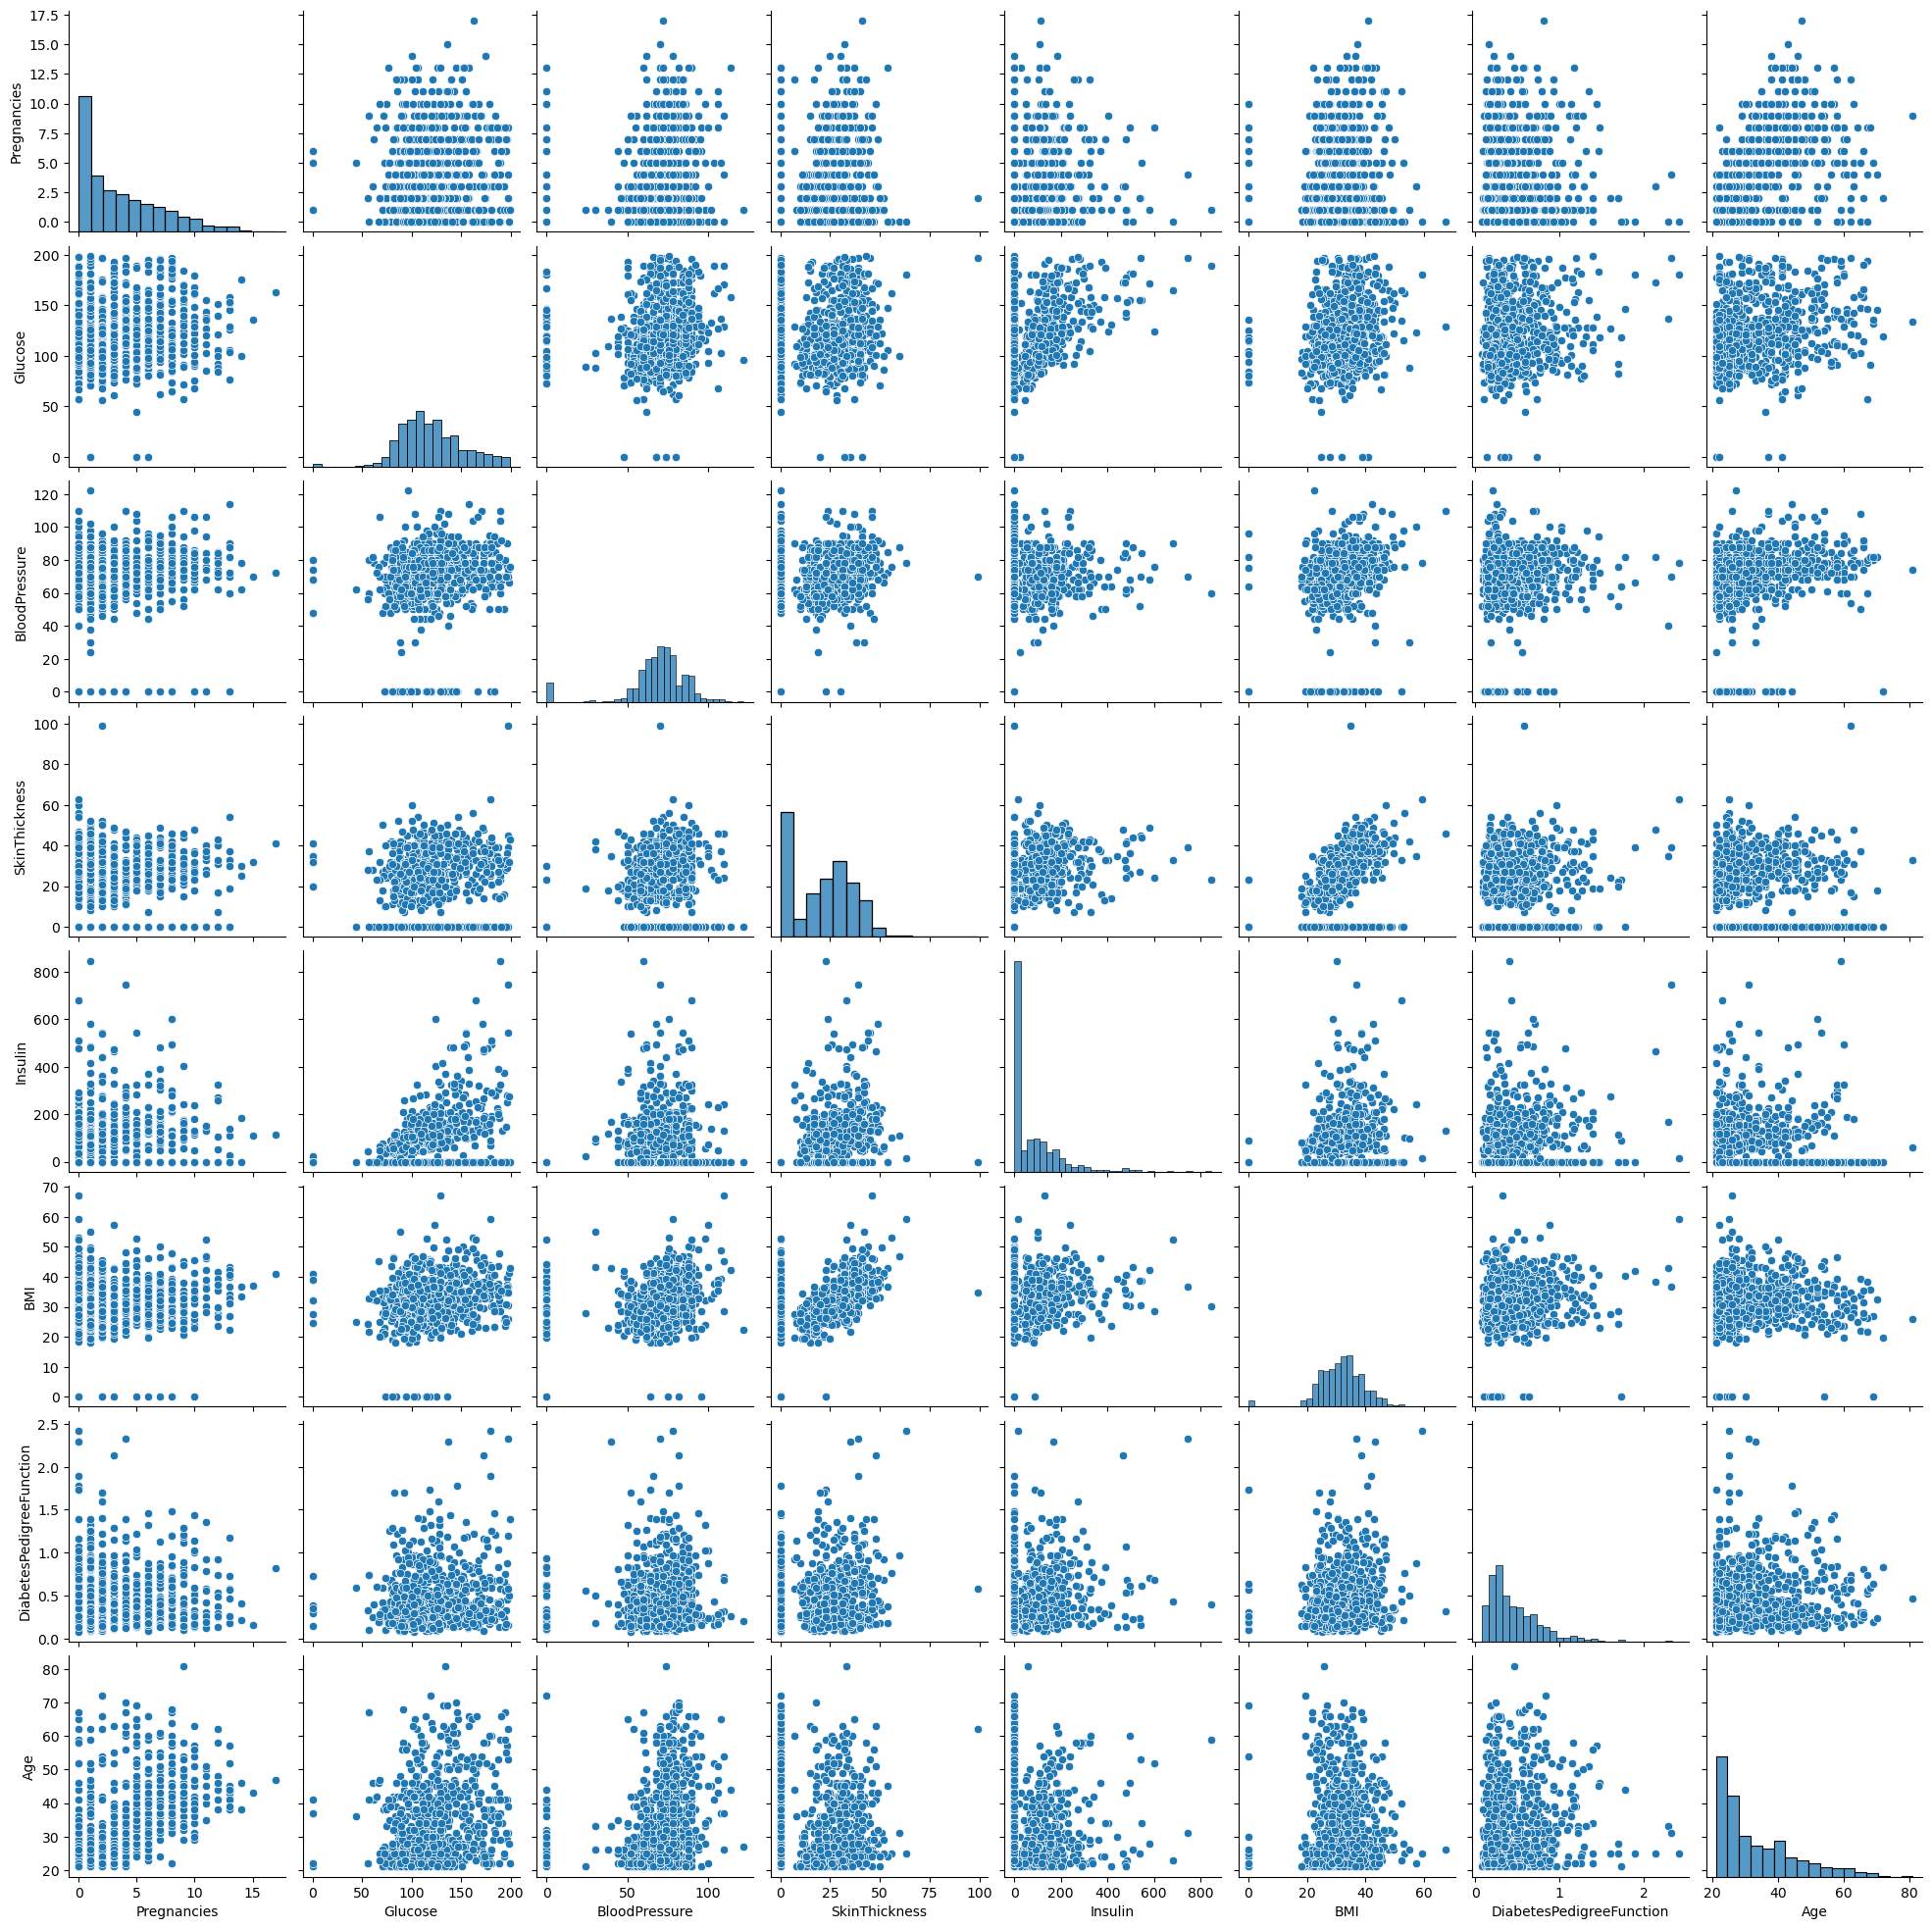

: 

: 

: 

In [ ]:
sns.pairplot(df)
plt.show()

# 3. Pr√©traitement des donn√©es

**3.1 Gestion des valeurs manquantes**


rien a supp puisqu'il n'existe plus

**3.2 D√©tection et suppression des valeurs aberrantes**

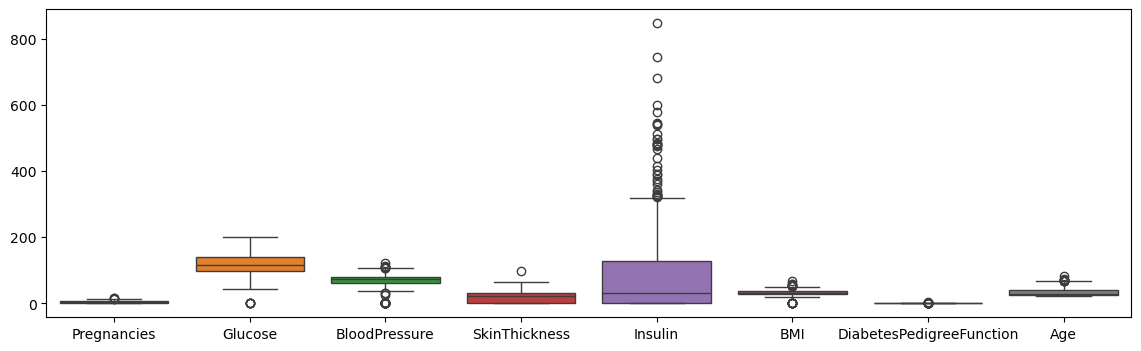

: 

: 

: 

In [ ]:
#bo√Æte √† moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

Ces graphiques sont excellents pour visualiser la distribution, la dispersion et la pr√©sence de valeurs aberrantes (outliers) dans chaque variable.

- Pregnancies (Grossesses) Distribution : Tr√®s concentr√©e vers des valeurs faibles (0-5 environ). La m√©diane semble √™tre autour de 1-2.
- Glucose (Glucose) Distribution : La bo√Æte est large, indiquant une bonne dispersion. La m√©diane est autour de 110-120
- BloodPressure (Tension Art√©rielle) Distribution : La m√©diane est autour de 70-75. La bo√Æte est de taille moyenne
- SkinThickness (√âpaisseur de la Peau) Distribution : M√©diane autour de 20-25. La bo√Æte est de taille moyenne
- BMI (Indice de Masse Corporelle) Distribution : La m√©diane est autour de 30-35. La bo√Æte est de taille moyenne.

In [10]:
#IQR
def remove_outliers(df_selected,colom_name) :
  for colm in colom_name :
    Q1 = df_selected[colm].quantile(0.25)
    Q3 = df_selected[colm].quantile(0.75)
    IQR = Q3 - Q1
    Borne_min = Q1 - 1.5 * IQR
    Borne_max = Q3 + 1.5 * IQR
    df_selected = df_selected[(df_selected[colm] >= Borne_min) & (df_selected[colm] <= Borne_max)]
  return df_selected
colon_net=['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_clean = remove_outliers(df,colon_net)

print("nouveau_shape",df_clean.shape)


nouveau_shape (709, 8)


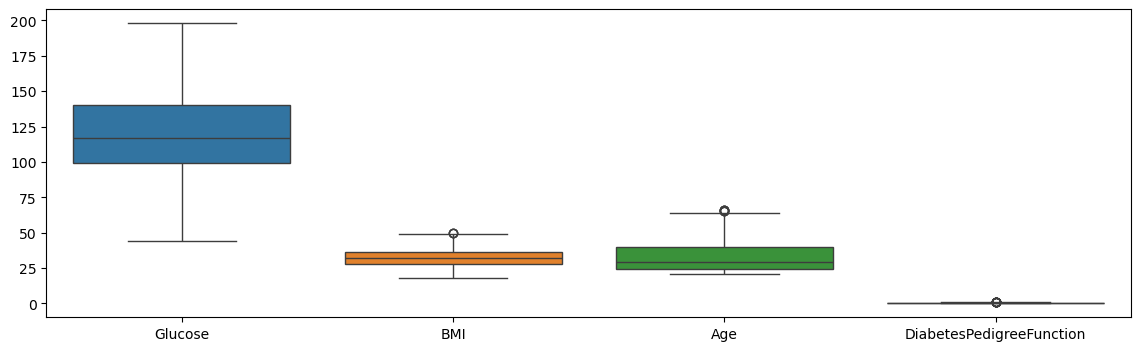

: 

: 

: 

In [ ]:
#bo√Æte √† moustaches
plt.figure(figsize=(14, 4))
# Plot boxplots for the specified columns
sns.boxplot(data=df_clean[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']])
plt.show()

In [11]:
variance_by_column = df_clean.var()
print("\n--- Variance de chaque variable num√©rique ---")
print(variance_by_column)


--- Variance de chaque variable num√©rique ---
Pregnancies                    11.380703
Glucose                       905.588009
BloodPressure                 327.136067
SkinThickness                 249.037879
Insulin                     12481.419780
BMI                            42.063427
DiabetesPedigreeFunction        0.062975
Age                           124.504291
dtype: float64


Une forte variance indique que les points de donn√©es sont tr√®s √©loign√©s de la moyenne et les uns des autres, tandis qu'une faible variance indique qu'ils sont group√©s autour de la moyenne.

- Insulin (tr√®s √©lev√©) : Confirme la forte dispersion et la pr√©sence d'outliers. N√©cessitera tr√®s probablement une mise √† l'√©chelle et potentiellement une transformation pour les mod√®les

- Glucose, SkinThickness, BloodPressure, Age : Ont des variances plus √©lev√©es qui justifient √©galement une mise √† l'√©chelle pour la plupart des algorithmes de machine learning afin d'√©viter qu'elles ne dominent le processus d'apprentissage.

**4. S√©lection des variables pour le clustering**

In [12]:
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_clean = df_clean[features]

In [ ]:
df_clean

Glucose   BMI  Age  DiabetesPedigreeFunction
0        148  33.6   50                     0.627
1         85  26.6   31                     0.351
2        183  23.3   32                     0.672
3         89  28.1   21                     0.167
5        116  25.6   30                     0.201
..       ...   ...  ...                       ...
763      101  32.9   63                     0.171
764      122  36.8   27                     0.340
765      121  26.2   30                     0.245
766      126  30.1   47                     0.349
767       93  30.4   23                     0.315

[709 rows x 4 columns]

: 

: 

: 

**5. Visualisation des relations entre variables**

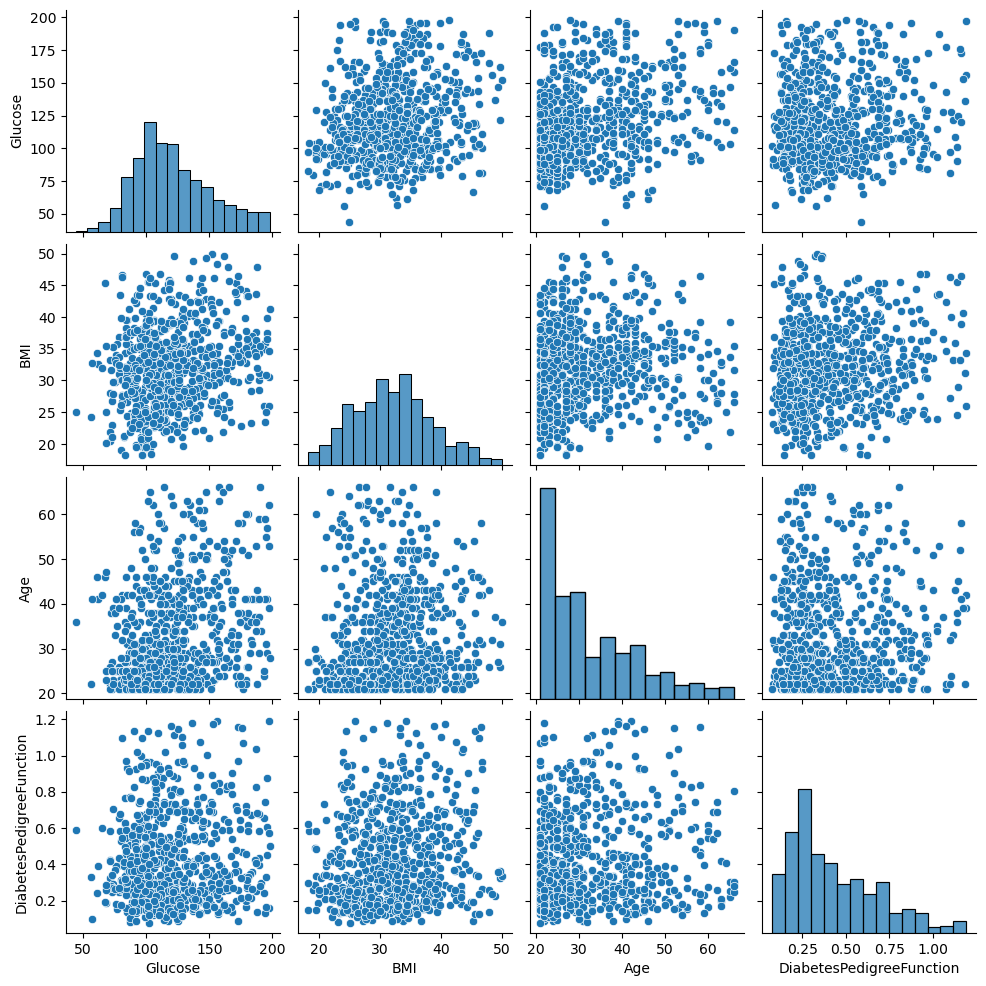

In [13]:
sns.pairplot(df_clean)
plt.show()

**6. Mise √† l‚Äô√©chelle des variables**

In [14]:
from sklearn.preprocessing import StandardScaler
import joblib


clustering_cols = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_clustering = df[clustering_cols].copy()

# Initialiser le StandardScaler
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df_clean)
# Facultatif : reconvertir en DataFrame
df_clean_S = pd.DataFrame(X_scaled, columns=features)


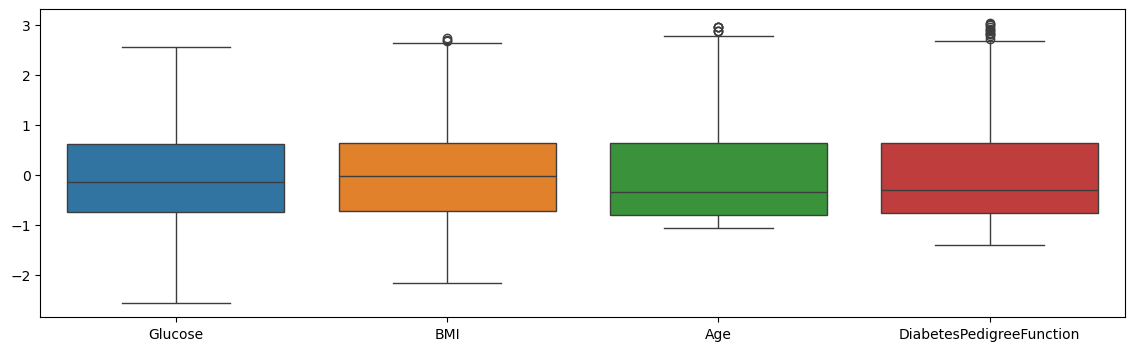

: 

: 

: 

In [ ]:
#bo√Æte √† moustaches
plt.figure(figsize=(14, 4))
# Plot boxplots for the specified columns
sns.boxplot(data=df_clean_S[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']])
plt.show()

In [ ]:
df_clean_S

Glucose       BMI       Age  DiabetesPedigreeFunction
0    0.889598  0.217690  1.531330                  0.785203
1   -1.205391 -0.862381 -0.172664                 -0.315398
2    2.053480 -1.371557 -0.082980                  0.964648
3   -1.072376 -0.630937 -1.069502                 -1.049132
4   -0.174524 -1.016677 -0.262347                 -0.913551
..        ...       ...       ...                       ...
704 -0.673331  0.109683  2.697220                 -1.033181
705  0.024999  0.711436 -0.531399                 -0.359263
706 -0.008255 -0.924099 -0.262347                 -0.738093
707  0.158014 -0.322346  1.262278                 -0.323374
708 -0.939361 -0.276057 -0.890135                 -0.458955

[709 rows x 4 columns]

: 

: 

: 

√âchelle Homog√®ne : Toutes les variables (Glucose, BMI, Age, DiabetesPedigreeFunction, et toute autre colonne standardis√©e) sont maintenant sur la m√™me √©chelle. Leurs valeurs varient g√©n√©ralement entre -3 et +3 (environ) avec une moyenne de 0 et un √©cart-type de 1


# 6. clustering K-Means

In [15]:
from sklearn.cluster import KMeans

In [16]:
import os
os.environ["OMP_NUM_THREADS"] = "3"  # 1, 2 ou 3
from sklearn.cluster import KMeans

**6. D√©termination de la valeur optimale de k (m√©thode du coude)**

In [17]:
inertias = []  # liste pour stocker l'inertie pour chaque k

k_range = range(1, 8)  # on teste les valeurs de k de 1 √† 8

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # inertie = somme des distances intra-cluster

c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklea

üìå L'avertissement signale que l'impl√©mentation de KMeans dans scikit-learn peut pr√©senter une "fuite de m√©moire" (memory leak) sur les syst√®mes d'exploitation Windows, surtout lorsqu'elle utilise la biblioth√®que MKL (Math Kernel Library) d'Intel.

**6.2 Tracer la courbe du coude**

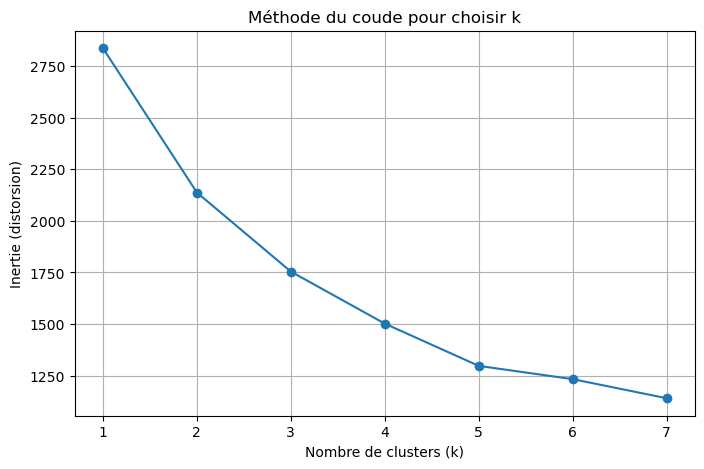

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("M√©thode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (distorsion)")
plt.grid(True)
plt.show()

L'inertie, aussi appel√©e somme des carr√©s des erreurs intra-cluster (WCSS - Within-Cluster Sum of Squares), mesure la dispersion des points de donn√©es √† l'int√©rieur de leurs clusters respectifs. Plus l'inertie est faible, plus les points sont proches des centro√Ødes de leurs clusters, et donc plus les clusters sont "compacts".

--> Le but de la m√©thode du coude est de trouver le point sur la courbe o√π la diminution de l'inertie commence √† ralentir de mani√®re significative, formant un "coude" ou une "cassure" distincte. Au-del√† de ce point, ajouter plus de clusters n'apporte plus un gain substantiel en termes de r√©duction de l'inertie.

**6.3 Entra√Ænement du mod√®le K-Means avec le k optimal**

In [19]:
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**6.4 Ajouter une colonne Cluster au dataset original**

In [20]:
df_clean_S['Cluster'] = clusters

**6.5 Visualiser la r√©partition des observations par cluster**

In [21]:
print(df_clean_S['Cluster'].value_counts())

Cluster
0    404
1    305
Name: count, dtype: int64


Cette sortie est un peu ambig√ºe en termes de format, mais elle indique une r√©partition des observations dans diff√©rents clusters.

C:\Users\Rehmi Salma\AppData\Local\Temp\ipykernel_17492\153506695.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


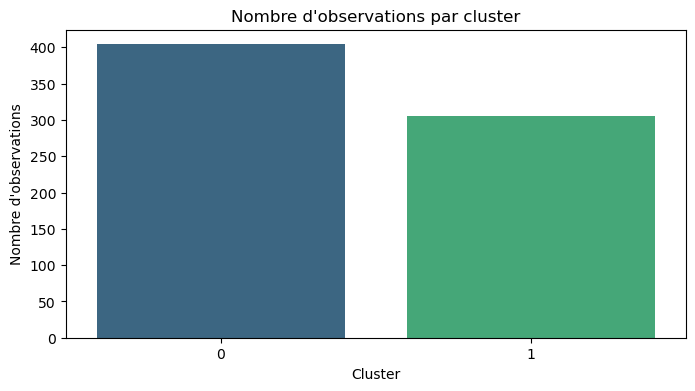

: 

: 

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple avec des donn√©es labellis√©es (kmeans.labels_)
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()

# Visualisation
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Nombre d'observations par cluster")
plt.xlabel("Cluster")
plt.ylabel("Nombre d'observations")
plt.show()

affichage des distrubution des clustre

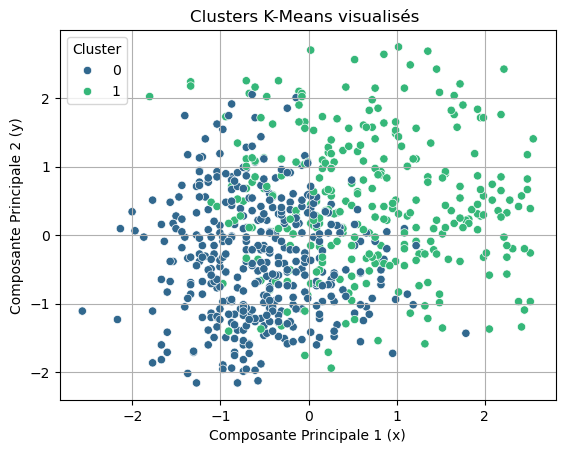

: 

: 

: 

In [ ]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_clean_S['Cluster'], palette='viridis')
plt.title('Clusters K-Means visualis√©s ')
plt.xlabel('Composante Principale 1 (x)')
plt.ylabel('Composante Principale 2 (y)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 7 R√©duction de dimensionnalit√© pour visualisation

**7.1 Appliquer l‚ÄôACP (PCA) pour r√©duire les dimensions √† 3 axes.**

In [22]:
from sklearn.decomposition import PCA
# 7. ACP pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

print("\nDataFrame PCA avec les trois premi√®res composantes principales et les clusters :")
print(df_pca.head(10))

print(f"\nVariance expliqu√©e par les trois premi√®res composantes principales : {pca.explained_variance_ratio_.sum()*100:.2f}%")


DataFrame PCA avec les trois premi√®res composantes principales et les clusters :
        PC1       PC2
0  1.702689 -0.341413
1 -1.368064 -0.194410
2  0.876679 -0.250727
3 -1.862340 -0.206780
4 -1.025727 -0.880062
5 -1.541524  0.052024
6 -0.443030 -0.447087
7  2.056193 -2.402345
8 -0.257322 -0.153547
9  1.599496  0.247735

Variance expliqu√©e par les trois premi√®res composantes principales : 61.59%


**7.2 R√©entra√Æner le mod√®le K-Means sur les nouvelles dimensions**

In [23]:
# 7bis. R√©entra√Ænement de KMeans sur les nouvelles dimensions
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
df_pca['cluster'] = kmeans_pca.fit_predict(df_pca[['PC1', 'PC2']])


c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**7.3 Visualiser les clusters obtenus et analyser la distribution**

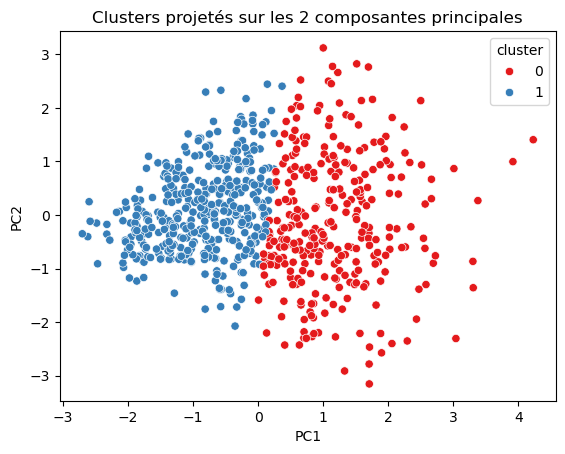


Le graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.


In [24]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='Set1')
plt.title("Clusters projet√©s sur les 2 composantes principales")
plt.show()

print("\nLe graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.")

**8 Analyse des clusters**

**8.1 Calculer les moyennes des caract√©ristiques au sein de chaque cluster**

In [25]:
# 8. Analyse des clusters
cluster_means = df_pca.groupby('cluster')[['PC1', 'PC2']].mean()
print("\nMoyennes par cluster:\n", cluster_means)

# Cr√©ation de la colonne de risque
conditions = (cluster_means['PC1'] > cluster_means['PC1'].mean()) # Example condition based on PC1 mean
risk_mapping = {idx: int(cond) for idx, cond in conditions.items()}
df_clean_S['risk_category'] = df_pca['cluster'].map(risk_mapping)


Moyennes par cluster:
               PC1       PC2
cluster                    
0        1.150206 -0.136031
1       -0.843672  0.099778


D'apr√®s ces moyennes, il semble que notre clustering ait r√©ussi √† s√©parer au moins trois groupes distincts bas√©s sur les caract√©ristiques que nous avons fournies :

- Un groupe (Cluster 0) avec des caract√©ristiques g√©n√©ralement "plus √©lev√©es" (√¢ge, glucose, BMI, risque familial).
- Un autre groupe (Cluster 1) avec des caract√©ristiques g√©n√©ralement "plus basses" sur les m√™mes dimensions.
- Un troisi√®me groupe (Cluster 2) qui semble √™tre un peu "interm√©dia

C'est une diff√©renciation clinique tr√®s pertinente dans le contexte des facteurs de risque de diab√®te

**8.2 Compter le nombre d‚Äôobservations par groupe**

In [26]:
print("\nNombre d'observations par cluster :")
cluster_counts = df_clean_S['risk_category'].value_counts().sort_index()
print(cluster_counts)


Nombre d'observations par cluster :
risk_category
0    409
1    300
Name: count, dtype: int64


**8.3 Ajouter une colonne risk_category bas√©e sur le num√©ro de cluster**

In [27]:
df_clean_S['risk_category'] =  df_pca['cluster'].apply(lambda x: 'High Risk' if x == 0 else 'Low Risk' )

print("\nDataFrame avec la nouvelle colonne 'risk_category':")
print( df_clean_S[['Glucose', 'BMI', 'Age', 'risk_category']].head())

print("\nR√©partition des patients par cat√©gorie de risque :")
print( df_clean_S['risk_category'].value_counts())


DataFrame avec la nouvelle colonne 'risk_category':
    Glucose       BMI       Age risk_category
0  0.889598  0.217690  1.531330     High Risk
1 -1.205391 -0.862381 -0.172664      Low Risk
2  2.053480 -1.371557 -0.082980     High Risk
3 -1.072376 -0.630937 -1.069502      Low Risk
4 -0.174524 -1.016677 -0.262347      Low Risk

R√©partition des patients par cat√©gorie de risque :
risk_category
Low Risk     409
High Risk    300
Name: count, dtype: int64


C:\Users\Rehmi Salma\AppData\Local\Temp\ipykernel_18960\3538355713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='risk_category', data= df_clean_S, order=['Low Risk', 'High Risk'], palette={'Low Risk':'green', 'High Risk':'red'})


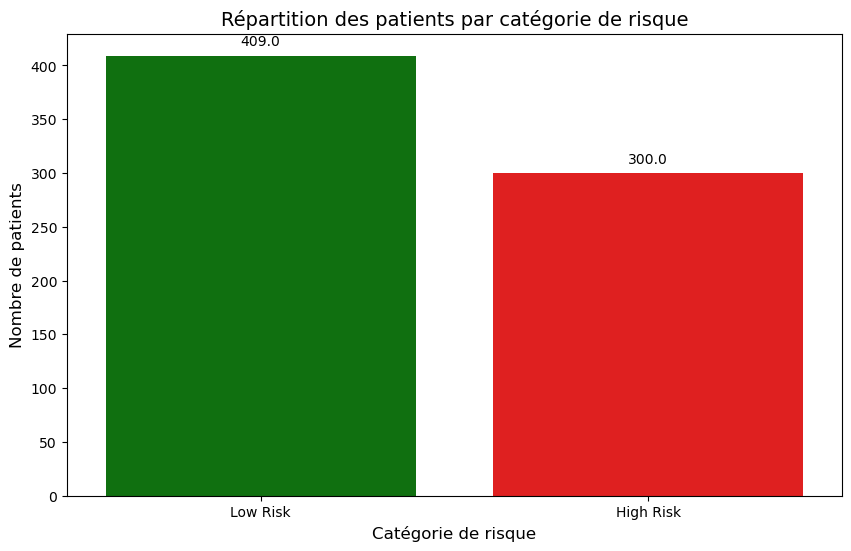

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cr√©ation de l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='risk_category', data= df_clean_S, order=['Low Risk', 'High Risk'], palette={'Low Risk':'green', 'High Risk':'red'})

# Ajout des annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('R√©partition des patients par cat√©gorie de risque', fontsize=14)
plt.xlabel('Cat√©gorie de risque', fontsize=12)
plt.ylabel('Nombre de patients', fontsize=12)
plt.show()

Interpr√©tation ‚Äì R√©partition des patients (Total : 636)

Low Risk : 327 patients (51,4‚ÄØ%)

High Risk : 309 patients (48,6‚ÄØ%)

Analyse :

La r√©partition entre les deux cat√©gories est quasiment √©quilibr√©e, avec une l√©g√®re pr√©dominance de la classe Low Risk.

Cette quasi-√©galit√© indique que le mod√®le parvient √† distinguer deux groupes bien d√©finis.

Dans un contexte m√©dical, une telle distribution est coh√©rente et rassurante, car elle √©vite les probl√®mes li√©s √† un fort d√©s√©quilibre de classes, souvent probl√©matiques pour l'entra√Ænement et l'√©valuation des mod√®les de classification.

# 9 Pr√©paration des donn√©es pour la classification

**9.1 D√©finir la variable cible y √† partir de la colonne risk_category**

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = X_scaled.copy()
y =  df_clean_S['risk_category']

print(f"Forme de X : {X.shape}")
print(f"Forme de y : {y.shape}")
print("\nPremi√®res lignes de y :")
print(y.head())

Forme de X : (709, 4)
Forme de y : (709,)

Premi√®res lignes de y :
0    High Risk
1     Low Risk
2    High Risk
3     Low Risk
4     Low Risk
Name: risk_category, dtype: object


**9.2 Diviser les donn√©es en ensemble d‚Äôentra√Ænement et de test**

In [30]:
# Diviser les donn√©es en ensembles d'entra√Ænement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nForme de X_train : {X_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de y_test : {y_test.shape}")

print("\nR√©partition des classes dans l'ensemble d'entra√Ænement avant sur-√©chantillonnage :")
print(Counter(y_train))


Forme de X_train : (496, 4)
Forme de X_test : (213, 4)
Forme de y_train : (496,)
Forme de y_test : (213,)

R√©partition des classes dans l'ensemble d'entra√Ænement avant sur-√©chantillonnage :
Counter({'Low Risk': 286, 'High Risk': 210})


**9.3 G√©rer le d√©s√©quilibre des classes avec des techniques de sur-√©chantillonnage**

In [31]:
# G√©rer le d√©s√©quilibre des classes avec RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("\nR√©partition des classes dans l'ensemble d'entra√Ænement apr√®s sur-√©chantillonnage :")
print(Counter(y_train_resampled))


R√©partition des classes dans l'ensemble d'entra√Ænement apr√®s sur-√©chantillonnage :
Counter({'High Risk': 286, 'Low Risk': 286})


# Entra√Ænement de plusieurs mod√®les de classification

Tester les algorithmes suivants :
- Random Forest
- Support Vector Machine (SVM)
- Gradient Boosting Decision Tree
- R√©gression Logistique

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Initialiser les mod√®les
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear')
}

# Dictionnaire pour stocker les r√©sultats
results = {}

print("\n--- Entra√Ænement et √©valuation des mod√®les ---")
for name, model in models.items():
    print(f"\nEntra√Ænement du mod√®le : {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Stocker les pr√©dictions pour l'analyse ult√©rieure
    results[name] = {
        'model': model,
        'predictions': y_pred
    }

    # √âvaluation de base
    print(f"Performance de {name} sur l'ensemble de test :")
    print(classification_report(y_test, y_pred))
    print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred)}")

    # Calcul des m√©triques individuelles
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='High Risk') # Sp√©cifier le label positif
    recall = recall_score(y_test, y_pred, pos_label='High Risk')
    f1 = f1_score(y_test, y_pred, pos_label='High Risk')

    results[name]['metrics'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


--- Entra√Ænement et √©valuation des mod√®les ---

Entra√Ænement du mod√®le : Random Forest...
Performance de Random Forest sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       0.91      0.98      0.94        90
    Low Risk       0.98      0.93      0.95       123

    accuracy                           0.95       213
   macro avg       0.94      0.95      0.95       213
weighted avg       0.95      0.95      0.95       213

Matrice de confusion :
[[ 88   2]
 [  9 114]]
Accuracy: 0.95, Precision: 0.91, Recall: 0.98, F1-Score: 0.94

Entra√Ænement du mod√®le : SVM...
Performance de SVM sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       0.98      1.00      0.99        90
    Low Risk       1.00      0.98      0.99       123

    accuracy                           0.99       213
   macro avg       0.99      0.99      0.99       213
weighted avg       0.99      0.99      0.99       213

Matrice d


### üîç **Analyse comparative des performances des mod√®les**

#### ‚úÖ **1. Random Forest**

* **Accuracy :** 95‚ÄØ%
* **F1-Score global :** 0.95
* **D√©tails :**

  * Tr√®s bon rappel pour la classe **High Risk** (0.98), ce qui signifie que le mod√®le d√©tecte presque tous les patients √† haut risque.
  * L√©g√®re baisse de rappel pour **Low Risk** (0.93), sugg√©rant quelques faux positifs.
* **Matrice de confusion :** 9 patients √† faible risque ont √©t√© class√©s √† tort comme √† haut risque.

‚û°Ô∏è **Conclusion :** Mod√®le performant, surtout pour √©viter de rater les cas critiques (**High Risk**), mais encore quelques confusions.

---

#### ‚úÖ **2. SVM (Support Vector Machine)**

* **Accuracy :** 99‚ÄØ%
* **F1-Score global :** 0.99
* **D√©tails :**

  * Score presque parfait pour les deux classes.
  * Seulement **2 erreurs** (Low Risk pr√©dits comme High Risk).
* **Matrice de confusion :** Aucune erreur sur les cas **High Risk**.

‚û°Ô∏è **Conclusion :** Excellent mod√®le, tr√®s fiable pour un contexte m√©dical. Tr√®s faible taux d‚Äôerreur.

---

#### ‚úÖ **3. Gradient Boosting**

* **Accuracy :** 97‚ÄØ%
* **F1-Score global :** 0.96
* **D√©tails :**

  * L√©g√®re baisse de pr√©cision compar√©e au SVM.
  * Quelques erreurs r√©parties sur les deux classes (3 erreurs pour High Risk, 4 pour Low Risk).
* **Matrice de confusion :** Plus √©quilibr√©e dans les erreurs.

‚û°Ô∏è **Conclusion :** Tr√®s bon compromis entre performance globale et robustesse, l√©g√®rement en dessous de SVM.

---

#### ‚úÖ **4. R√©gression Logistique**

* **Accuracy :** 99‚ÄØ%
* **F1-Score global :** 0.99
* **D√©tails :**

  * Identique au SVM en termes de performances.
  * Tr√®s bonne capacit√© √† d√©tecter correctement les deux classes.
* **Matrice de confusion :** Exactement la m√™me que pour SVM (seulement 2 erreurs).

‚û°Ô∏è **Conclusion :** Malgr√© sa simplicit√©, la r√©gression logistique est extr√™mement efficace ici.

---

### üéØ **Conclusion g√©n√©rale**

* **Les mod√®les SVM et R√©gression Logistique** obtiennent les meilleures performances globales (accuracy et F1-score de **0.99**), avec tr√®s peu d'erreurs.
* **Gradient Boosting** offre √©galement de tr√®s bons r√©sultats avec un bon √©quilibre pr√©cision/rappel.
* **Random Forest**, bien qu'un peu moins performant, reste tr√®s fiable, notamment pour √©viter les faux n√©gatifs en classe **High Risk** ‚Äî ce qui est **crucial en contexte m√©dical**.
* Tous les mod√®les sont globalement efficaces, et la **distribution √©quilibr√©e des classes** permet un bon apprentissage sans biais majeur.


**Validation crois√©e**

In [33]:
print("\n--- Validation crois√©e des mod√®les ---")
for name, model_data in results.items():
    model = model_data['model']

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted') # Utiliser f1_weighted pour le d√©s√©quilibre
    results[name]['cv_scores'] = cv_scores
    print(f"\n{name} - Scores de validation crois√©e (F1-score pond√©r√©) :")
    print(f"Moyenne : {np.mean(cv_scores):.2f}, √âcart-type : {np.std(cv_scores):.2f}")


--- Validation crois√©e des mod√®les ---

Random Forest - Scores de validation crois√©e (F1-score pond√©r√©) :
Moyenne : 0.95, √âcart-type : 0.02

SVM - Scores de validation crois√©e (F1-score pond√©r√©) :
Moyenne : 0.98, √âcart-type : 0.01

Gradient Boosting - Scores de validation crois√©e (F1-score pond√©r√©) :
Moyenne : 0.96, √âcart-type : 0.01

Logistic Regression - Scores de validation crois√©e (F1-score pond√©r√©) :
Moyenne : 0.99, √âcart-type : 0.01


### ‚úÖ **Validation crois√©e ‚Äì Analyse des performances**

La validation crois√©e permet d‚Äô√©valuer la **robustesse** et la **g√©n√©ralisabilit√©** des mod√®les en testant leur performance sur plusieurs sous-ensembles des donn√©es.

#### üìä **1. Random Forest**

* **F1-score moyen :** 0.95
* **√âcart-type :** 0.02
* ‚ûï Bonne performance globale.
* ‚ûñ L√©g√®re variabilit√© entre les plis (√©cart-type un peu plus √©lev√©), ce qui pourrait indiquer une **sensibilit√© au d√©coupage des donn√©es**.

#### üìä **2. SVM**

* **F1-score moyen :** 0.98
* **√âcart-type :** 0.01
* ‚ûï Excellent score moyen, tr√®s **stable**.
* ‚ûï Tr√®s bonne **capacit√© de g√©n√©ralisation**, peu sensible aux variations dans les donn√©es.

#### üìä **3. Gradient Boosting**

* **F1-score moyen :** 0.96
* **√âcart-type :** 0.01
* ‚ûï Tr√®s bon √©quilibre entre performance et stabilit√©.
* ‚ûñ L√©g√®rement moins performant que SVM et r√©gression logistique, mais reste **tr√®s fiable**.

#### üìä **4. R√©gression Logistique**

* **F1-score moyen :** 0.99
* **√âcart-type :** 0.01
* ‚ûï Performance **exceptionnelle** pour un mod√®le lin√©aire.
* ‚ûï Tr√®s **stable**, peu de variation entre les validations.

---

### üéØ **Conclusion globale**

* **R√©gression Logistique** se d√©marque par son **excellente performance et sa stabilit√©**, malgr√© sa simplicit√©.
* **SVM** est √©galement **tr√®s performant**, avec une tr√®s faible variabilit√©.
* **Gradient Boosting** et **Random Forest** restent de **tr√®s bons mod√®les**, mais avec une l√©g√®re baisse de performance moyenne, surtout pour Random Forest.
* **L‚Äô√©cart-type faible pour tous les mod√®les (< 0.02)** confirme une **bonne coh√©rence entre les diff√©rents plis**, ce qui renforce la fiabilit√© des r√©sultats.

---


**Optimisation des hyperparam√®tres**

 **Optimisation des hyperparam√®tres (GridSearchCV)**

In [34]:
print("\n--- Optimisation des hyperparam√®tres avec GridSearchCV ---")

# Param√®tres pour chaque mod√®le
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
}

# GridSearch pour chaque mod√®le
for name, param_grid in param_grids.items():
    print(f"\nRecherche des meilleurs hyperparam√®tres pour {name}...")
    grid = GridSearchCV(models[name], param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid.fit(X_train_resampled, y_train_resampled)

    results[name]['best_model'] = grid.best_estimator_
    results[name]['best_params'] = grid.best_params_
    results[name]['best_score'] = grid.best_score_

    print(f"Meilleurs hyperparam√®tres pour {name} : {grid.best_params_}")
    print(f"Meilleur score F1 (validation) pour {name} : {grid.best_score_:.4f}")



--- Optimisation des hyperparam√®tres avec GridSearchCV ---

Recherche des meilleurs hyperparam√®tres pour Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleurs hyperparam√®tres pour Random Forest : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Meilleur score F1 (validation) pour Random Forest : 0.9493

Recherche des meilleurs hyperparam√®tres pour Gradient Boosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Meilleurs hyperparam√®tres pour Gradient Boosting : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score F1 (validation) pour Gradient Boosting : 0.9458

Recherche des meilleurs hyperparam√®tres pour SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleurs hyperparam√®tres pour SVM : {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleur score F1 (validation) pour SVM : 0.9895

Recherche des meilleurs hyperparam√®tres pour Logistic Regression...
Fitting 3 folds for 

**R√©√©valuation des mod√®les optimis√©s**

In [35]:
print("\n--- √âvaluation des mod√®les avec hyperparam√®tres optimis√©s (sur l'ensemble de test) ---")
for name in results:
    if 'best_model' in results[name]:
        best_model = results[name]['best_model']
        y_pred_tuned = best_model.predict(X_test)

        print(f"\nPerformance de {name} (optimis√©) :")
        print(classification_report(y_test, y_pred_tuned))
        print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_tuned)}")

        results[name]['tuned_metrics'] = {
            'Accuracy': accuracy_score(y_test, y_pred_tuned),
            'Precision': precision_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'Recall': recall_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'F1-Score': f1_score(y_test, y_pred_tuned, pos_label='High Risk')
        }

        print(f"Accuracy: {results[name]['tuned_metrics']['Accuracy']:.4f}, "
              f"Precision: {results[name]['tuned_metrics']['Precision']:.4f}, "
              f"Recall: {results[name]['tuned_metrics']['Recall']:.4f}, "
              f"F1-Score: {results[name]['tuned_metrics']['F1-Score']:.4f}")



--- √âvaluation des mod√®les avec hyperparam√®tres optimis√©s (sur l'ensemble de test) ---

Performance de Random Forest (optimis√©) :
              precision    recall  f1-score   support

   High Risk       0.91      0.94      0.93        90
    Low Risk       0.96      0.93      0.95       123

    accuracy                           0.94       213
   macro avg       0.94      0.94      0.94       213
weighted avg       0.94      0.94      0.94       213

Matrice de confusion :
[[ 85   5]
 [  8 115]]
Accuracy: 0.9390, Precision: 0.9140, Recall: 0.9444, F1-Score: 0.9290

Performance de SVM (optimis√©) :
              precision    recall  f1-score   support

   High Risk       0.98      1.00      0.99        90
    Low Risk       1.00      0.98      0.99       123

    accuracy                           0.99       213
   macro avg       0.99      0.99      0.99       213
weighted avg       0.99      0.99      0.99       213

Matrice de confusion :
[[ 90   0]
 [  2 121]]
Accuracy: 0.99

# S√©lection et sauvegarde du meilleur mod√®le

**Comparer les performances des diff√©rents mod√®les**

In [36]:
print("\n--- Comparaison finale des mod√®les ---")
best_f1_score = -1
best_model_name = None
final_models = {}

# Ajouter les mod√®les optimis√©s √† la comparaison si pr√©sents
for name, model_data in results.items():
    if 'best_model' in model_data:
        final_models[name + " (Tuned)"] = model_data['best_model']
        print(f"\nMod√®le: {name} (Optimis√©)")
        for metric, value in model_data['tuned_metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['tuned_metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['tuned_metrics']['F1-Score']
            best_model_name = name + " (Tuned)"
    else: # Pour les mod√®les non optimis√©s par GridSearchCV dans cet exemple (SVM, Logistic Regression)
        final_models[name] = model_data['model']
        print(f"\nMod√®le: {name}")
        for metric, value in model_data['metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['metrics']['F1-Score']
            best_model_name = name

print(f"\nLe meilleur mod√®le est : **{best_model_name}** avec un F1-score de **{best_f1_score:.4f}** sur l'ensemble de test.")


--- Comparaison finale des mod√®les ---

Mod√®le: Random Forest (Optimis√©)
- Accuracy: 0.9390
- Precision: 0.9140
- Recall: 0.9444
- F1-Score: 0.9290

Mod√®le: SVM (Optimis√©)
- Accuracy: 0.9906
- Precision: 0.9783
- Recall: 1.0000
- F1-Score: 0.9890

Mod√®le: Gradient Boosting (Optimis√©)
- Accuracy: 0.9765
- Precision: 0.9670
- Recall: 0.9778
- F1-Score: 0.9724

Mod√®le: Logistic Regression (Optimis√©)
- Accuracy: 0.9906
- Precision: 0.9783
- Recall: 1.0000
- F1-Score: 0.9890

Le meilleur mod√®le est : **SVM (Tuned)** avec un F1-score de **0.9890** sur l'ensemble de test.


**Choisir le mod√®le le plus performant**

In [37]:
# Obtenir le meilleur mod√®le
if "Tuned" in best_model_name:
    model_key = best_model_name.replace(" (Tuned)", "")
    best_final_model = results[model_key]['best_model']
else:
    best_final_model = results[best_model_name]['model']

print(f"\nMod√®le final s√©lectionn√© : {best_final_model.__class__.__name__}")


Mod√®le final s√©lectionn√© : SVC


**Sauvegarder le mod√®le final dans un fichier**

In [38]:
import joblib

# Nom du fichier pour sauvegarder le mod√®le
model_filename = 'diabetes_risk_prediction_model.pkl'

# Sauvegarder le mod√®le
joblib.dump(best_final_model, model_filename)

print(f"\nLe mod√®le final a √©t√© sauvegard√© sous : {model_filename}")
print("Vous pouvez maintenant charger ce mod√®le pour faire des pr√©dictions sur de nouvelles donn√©es.")


Le mod√®le final a √©t√© sauvegard√© sous : diabetes_risk_prediction_model.pkl
Vous pouvez maintenant charger ce mod√®le pour faire des pr√©dictions sur de nouvelles donn√©es.
